In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
plt.style.use("ggplot")

# Part A

### Exercise 1

In [2]:
def get_matrix(n):
    if n <= 0:
        return np.array([[]])
    else:
        return np.random.randint(1,10, size=(n,n))

### Exercise 2

In [3]:
matrix5 = get_matrix(5)
matrix5

array([[6, 8, 1, 6, 1],
       [2, 9, 2, 9, 2],
       [3, 7, 8, 8, 8],
       [4, 4, 3, 1, 9],
       [6, 7, 3, 2, 8]])

In [4]:
matrix7 = get_matrix(7)
matrix7

array([[4, 5, 8, 9, 3, 9, 2],
       [7, 5, 4, 7, 6, 3, 4],
       [1, 8, 8, 6, 2, 7, 1],
       [4, 7, 9, 7, 5, 8, 6],
       [9, 7, 3, 8, 6, 3, 3],
       [4, 9, 1, 7, 6, 2, 1],
       [6, 7, 3, 1, 7, 3, 5]])

### Exercise 3

In [5]:
def matrix_sort(lst):
    length = len(lst)
    for i in range(length - 1):
        for j in range(length - 1):
            if lst[j][j] > lst[j+1][j+1]:
                lst[j][j], lst[j+1][j+1] = lst[j+1][j+1], lst[j][j]

In [6]:
matrix_sort(matrix5)
matrix5

array([[1, 8, 1, 6, 1],
       [2, 6, 2, 9, 2],
       [3, 7, 8, 8, 8],
       [4, 4, 3, 8, 9],
       [6, 7, 3, 2, 9]])

In [7]:
matrix_sort(matrix7)
matrix7

array([[2, 5, 8, 9, 3, 9, 2],
       [7, 4, 4, 7, 6, 3, 4],
       [1, 8, 5, 6, 2, 7, 1],
       [4, 7, 9, 5, 5, 8, 6],
       [9, 7, 3, 8, 6, 3, 3],
       [4, 9, 1, 7, 6, 7, 1],
       [6, 7, 3, 1, 7, 3, 8]])

### Exercise 4

In [8]:
lst = [1,9,6,4,5]

In [9]:
def count_inversion(lst): 
    jump_lst = [] 
    for i in range(len(lst)):
        swapped = False
        for j in range(len(lst) - i - 1):
            if lst[j] > lst[j + 1]:
                swapped = True
                jump_lst.append((lst[j],lst[j+1]))
                lst[j], lst[j+1] = lst[j+1], lst[j]
        if not swapped:
            break
    return jump_lst

In [10]:
count_inversion(lst)

[(9, 6), (9, 4), (9, 5), (6, 4), (6, 5)]

# Part B

### Exercise 1

In [11]:
try:
    df = pd.read_csv("cancer.csv")
    print("Loaded")
except:
    print("Error")

Loaded


In [12]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### Exercise 2

In [13]:
df.shape[0]

569

### Exercise 3

In [14]:
df.groupby("diagnosis")["radius_mean"].mean()

diagnosis
B    12.146524
M    17.462830
Name: radius_mean, dtype: float64

### Exercise 4

In [15]:
df[df["diagnosis"]=="M"][["area_se","area_mean"]].mean().tail(1)

area_mean    978.376415
dtype: float64

### Exercise 5

In [16]:
df[df["perimeter_mean"]<df["perimeter_mean"].mean()].shape[0]

343

### Exercise 6

In [17]:
temp = df[df["compactness_mean"]<df["compactness_mean"].mean()]
temp.groupby("diagnosis")["compactness_mean"].count()

diagnosis
B    282
M     44
Name: compactness_mean, dtype: int64

### Exercise 7

<AxesSubplot:xlabel='diagnosis'>

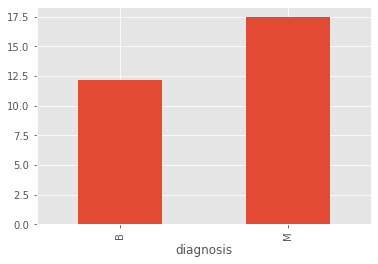

In [18]:
df.groupby("diagnosis")["radius_mean"].mean().plot(kind="bar")

<AxesSubplot:ylabel='radius_mean'>

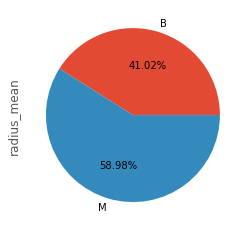

In [19]:
df.groupby("diagnosis")["radius_mean"].mean().plot.pie(autopct="%1.2f%%")

<AxesSubplot:ylabel='compactness_mean'>

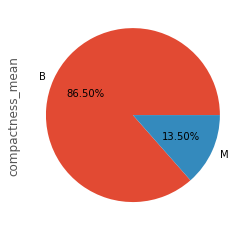

In [20]:
temp.groupby("diagnosis")["compactness_mean"].count().plot.pie(autopct="%1.2f%%")

# Part C

### Exercise 1

##### Section a

In [21]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

##### Section b

In [22]:
df.drop(columns=["Unnamed: 32","id"] , inplace=True)

In [23]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Exercise 2

In [25]:
numerical_cols=df.select_dtypes(exclude=['object']).columns
for col in numerical_cols:
    df[col] = (df[col] - df[col].mean()) / df[col].std()
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,M,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,M,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,M,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,M,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


### Exercise 3

In [26]:
unsupervised_data = df.copy()

In [27]:
supervised_data = df.copy()

### Exercise 4

##### Section a

In [28]:
data = supervised_data.drop(columns=["diagnosis"])
labels = supervised_data["diagnosis"]

##### Section b

In [29]:
unsupervised_data.drop(columns=["diagnosis"] , inplace=True)

# Part D

### Exercise 1

In [30]:
sse = []
for i in range(2,16):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(unsupervised_data)
    sse.append(kmeans.inertia_)

<AxesSubplot:xlabel='K'>

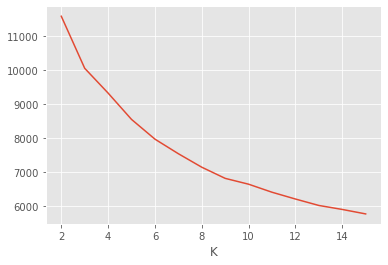

In [31]:
result = pd.DataFrame({
    "K": range(2,16),
    "SSE": sse
})
result.set_index("K", inplace=True)
result["SSE"].plot()

In [32]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [33]:
kmeans.labels_

array([1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 0, 0,
       2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1,
       0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0,
       2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 1,
       1, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 2, 2, 2, 2, 0, 1, 1,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [34]:
metrics.silhouette_score(data, kmeans.labels_)

0.31438400986080983

In [35]:
unsupervised_data["cluster"] = kmeans.labels_
unsupervised_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cluster
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,1
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,1
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,1
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,2
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,...,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467,1
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,...,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122,1
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,...,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129,0
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,...,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684,1


In [36]:
unsupervised_data.groupby("cluster").describe()

radius_mean                                                    \
              count      mean       std       min       25%       50%   
cluster                                                                 
0             359.0 -0.447701  0.569111 -2.027864 -0.798029 -0.473118   
1             110.0  1.617659  0.668252  0.233455  1.196836  1.538772   
2             100.0 -0.172177  0.640406 -1.826391 -0.632736 -0.088617   

                            texture_mean            ... symmetry_worst  \
              75%       max        count      mean  ...            75%   
cluster                                             ...                  
0       -0.114156  1.328786        359.0 -0.241643  ...       0.137785   
1        1.833178  3.967796        110.0  0.626062  ...       0.743112   
2        0.315747  1.073398        100.0  0.178829  ...       1.376320   

                  fractal_dimension_worst                                \
              max                   count      mean       std       min   
cluster                                                                   
0        3.202401                   359.0 -0.411083  0.554687 -1.600431   
1        4.295059                   110.0  0.083992  0.819891 -1.588804   
2        6.040726                   100.0  1.383396  1.153640 -0.872908   

                                                 
              25%       50%       75%       max  
cluster                                          
0       -0.818648 -0.429417 -0.108565  1.331810  
1       -0.437722 -0.014718  0.499643  2.533276  
2        0.627956  1.226613  1.956074  6.840837  

[3 rows x 240 columns]

### Exercise 2

In [37]:
x_train,x_test,y_train,y_test = train_test_split(data,labels, test_size=0.25)

In [38]:
Rf = RandomForestClassifier(n_estimators = 100)
Rf.fit(x_train,y_train)
Rf_pred = Rf.predict(x_test)

In [39]:
metrics.confusion_matrix(y_test,Rf_pred)

array([[86,  1],
       [ 4, 52]], dtype=int64)

In [40]:
metrics.accuracy_score(y_test,Rf_pred)

0.965034965034965

### Exercise 3

##### עבור הסופרביז
בגלל שזה מחולק רק ל2 אופיות וזה רנדום פורסט אז אין אובר פיטיג ואחוז הדיוק טוב

##### עבור לאן סופרביז
יצא חיובי אך לא מספיק מדיוק כי 0.31 זה יותר קרוב ל0 מאשר ל1